# HR Attrition Analysis

### Import necessary libraries

In [254]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")
from warnings import filterwarnings
filterwarnings('ignore')

### Data Collection

In [255]:
# Reading Data
df = pd.read_csv(r'data\HR_Analytics.csv',na_values= "na")

In [256]:
# Check rows and columns in dataset
print(f"No. of Rows in dataset: {df.shape[0]}")
print(f"No. of Columns in dataset: {df.shape[1]}")

No. of Rows in dataset: 1480
No. of Columns in dataset: 38


In [257]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [258]:
df.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


### Data Preprocessing

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1480.0,36.917568,9.128559,18.0,30.00,36.0,43.00,60.0
DailyRate,1480.0,801.384459,403.126988,102.0,465.00,800.0,1157.00,1499.0
DistanceFromHome,1480.0,9.220270,8.131201,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910811,1.023796,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1480.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1480.0,1031.860811,605.955046,1.0,493.75,1027.5,1568.25,2068.0
EnvironmentSatisfaction,1480.0,2.724324,1.092579,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.845270,20.328266,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1480.0,2.729730,0.713007,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.064865,1.105574,1.0,1.00,2.0,3.00,5.0


In [261]:
# define numerical & categorical columns
numeric_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if df[col].dtype == 'O']

# print columns
print(f'We have {len(numeric_col)} numerical col : {numeric_col}')
print(f'\nWe have {len(categorical_col)} categorical col : {categorical_col}')

We have 26 numerical col : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

We have 12 categorical col : ['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime']


The dataset has *__1,480 entries__* and *__38 columns__* with details such as employee demographics, job satisfaction, job involvement, and performance metrics. There is only one column, YearsWithCurrManager, with some missing values.

Key column of interest - 
- __Attrition (Yes/No)__ – Indicator of employee turnover
- __Age, JobRole, MonthlyIncome, YearsAtCompany__ – Attributes likely impacting retention and job satisfaction
- __WorkLifeBalance, JobSatisfaction, EnvironmentSatisfaction__ – Indicators of employee well-being and satisfaction

In [262]:
# Checking the number of missing values in the dataset to confirm
missing_values = df.isnull().sum()

# Displaying the count of missing values for each column
missing_values[missing_values > 0]


YearsWithCurrManager    57
dtype: int64

The only column with missing values is YearsWithCurrManager, which has 57 missing entries.   

A reasonable approach here could be:

1. **Imputation**: Filling in the missing values with the median or mean, especially if this is a numerical variable.
2. **Analysis**: Determining if missing values are linked to specific employee types (e.g., new hires).

I choose the 2nd approach to check missing values are linked to employee or not.

In [263]:
# Checking for missing values in 'YearsWithCurrManager'
missing_manager_years = df['YearsWithCurrManager'].isnull().sum()

# Calculating the proportion of missing values
missing_proportion = missing_manager_years / len(df) * 100

# Exploring distribution of 'YearsWithCurrManager' for non-missing values
manager_years_distribution = df['YearsWithCurrManager'].describe()

# Exploring patterns of missing data by grouping
missing_data_analysis = df[df['YearsWithCurrManager'].isnull()].groupby('Attrition').size()

print(f"Total no. of Missing values in 'YearsWithCurrManager' : {missing_manager_years}")
print(f"Proportion of missing values : {missing_proportion}")
print(f"Distribution of non-missing values : {manager_years_distribution}")
print(f"Patterns of missing data :{missing_data_analysis}")


Total no. of Missing values in 'YearsWithCurrManager' : 57
Proportion of missing values : 3.8513513513513518
Distribution of non-missing values : count    1423.000000
mean        4.118060
std         3.555484
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64
Patterns of missing data :Attrition
No     49
Yes     8
dtype: int64


In [264]:
# Impute missing values based on attrition groups using transform for alignment
df['YearsWithCurrManager'] = df.groupby('Attrition')['YearsWithCurrManager'].transform(lambda x: x.fillna(x.median()))

# Verify if all missing values are handled
missing_after_imputation = df['YearsWithCurrManager'].isnull().sum()
print(f'Missing values after imputation: {missing_after_imputation}')


Missing values after imputation: 0


In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1480.0,36.917568,9.128559,18.0,30.00,36.0,43.00,60.0
DailyRate,1480.0,801.384459,403.126988,102.0,465.00,800.0,1157.00,1499.0
DistanceFromHome,1480.0,9.220270,8.131201,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910811,1.023796,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1480.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1480.0,1031.860811,605.955046,1.0,493.75,1027.5,1568.25,2068.0
EnvironmentSatisfaction,1480.0,2.724324,1.092579,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.845270,20.328266,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1480.0,2.729730,0.713007,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.064865,1.105574,1.0,1.00,2.0,3.00,5.0


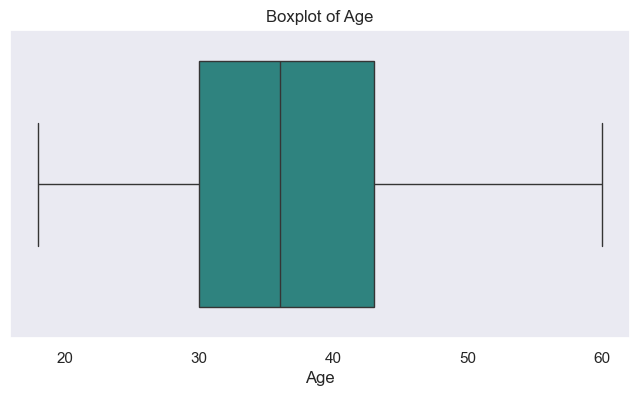

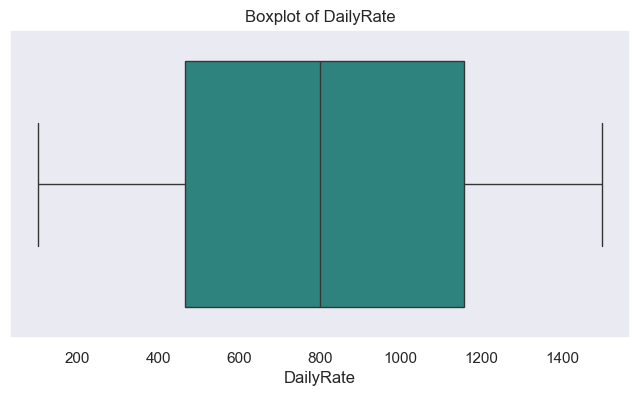

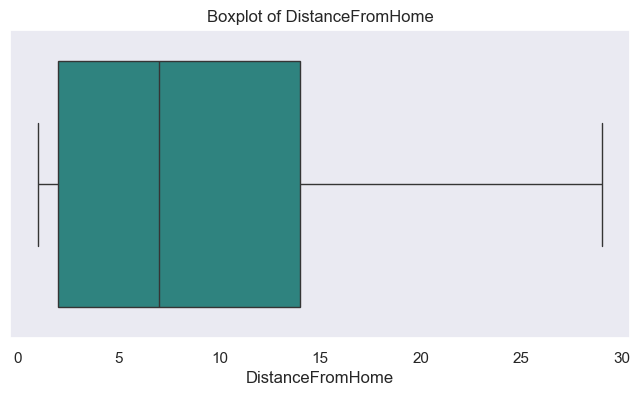

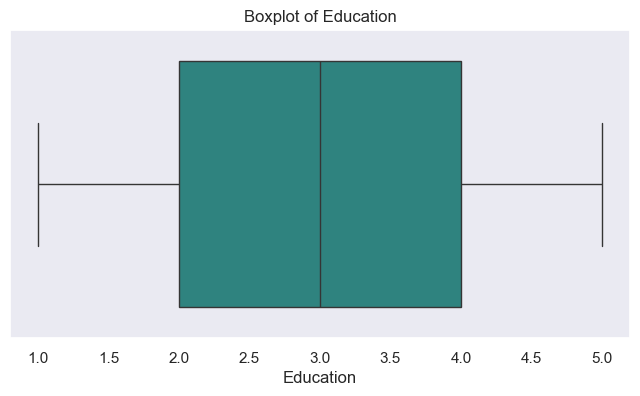

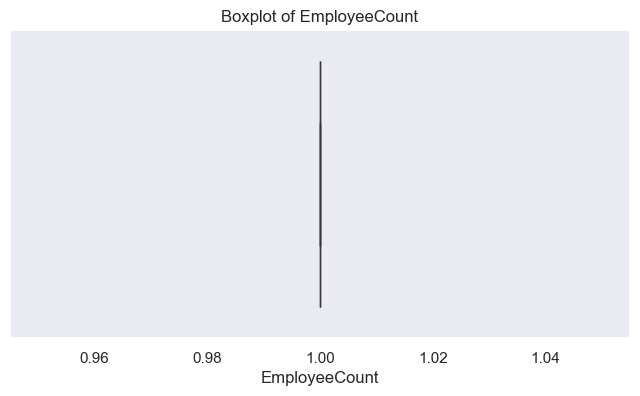

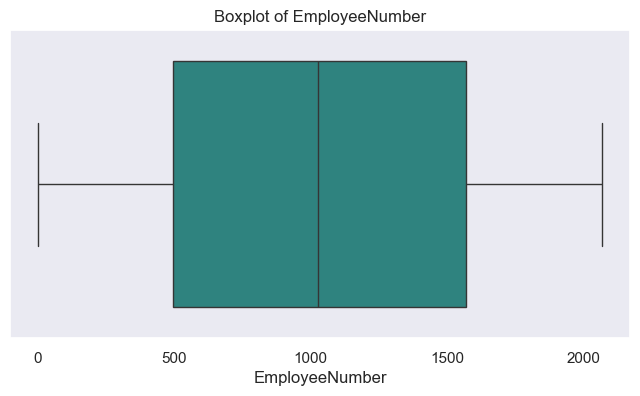

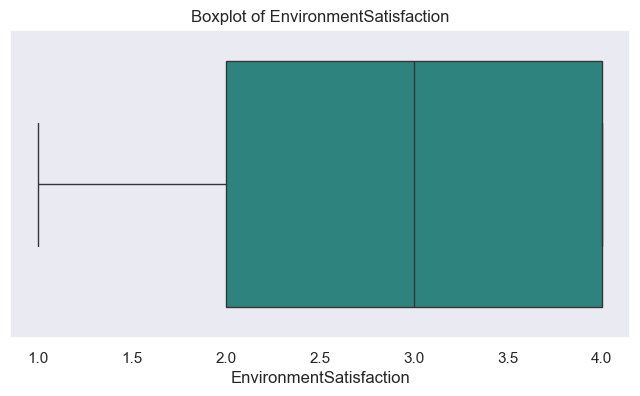

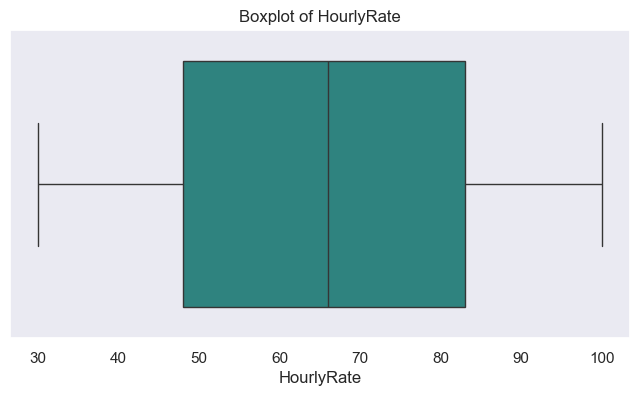

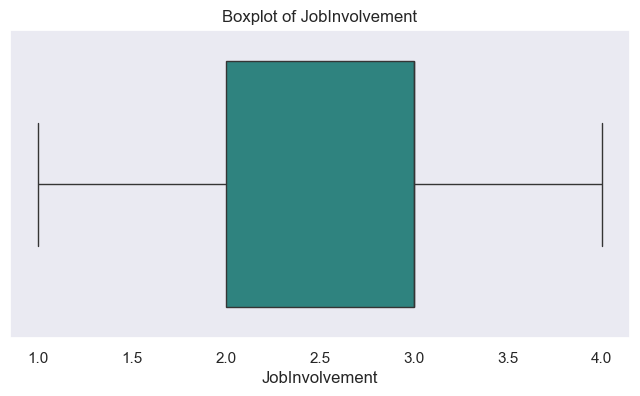

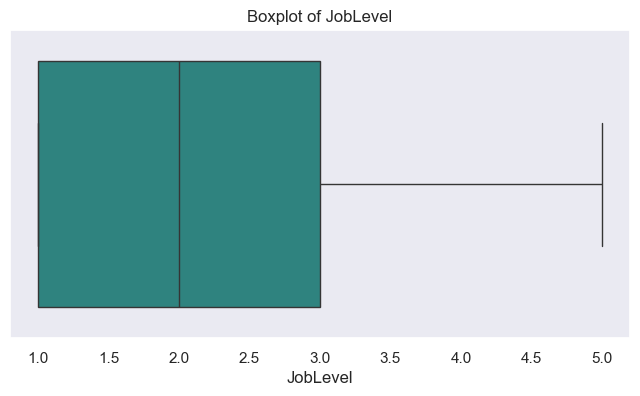

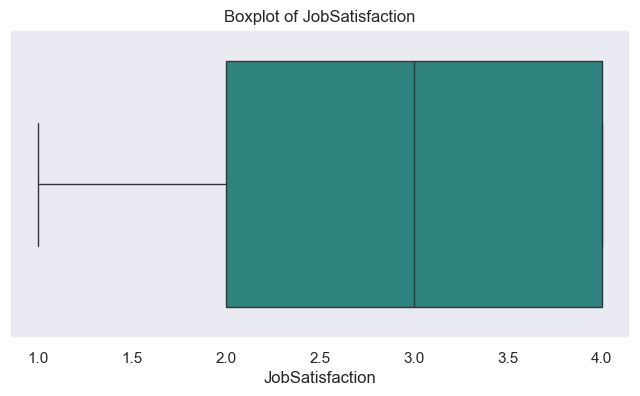

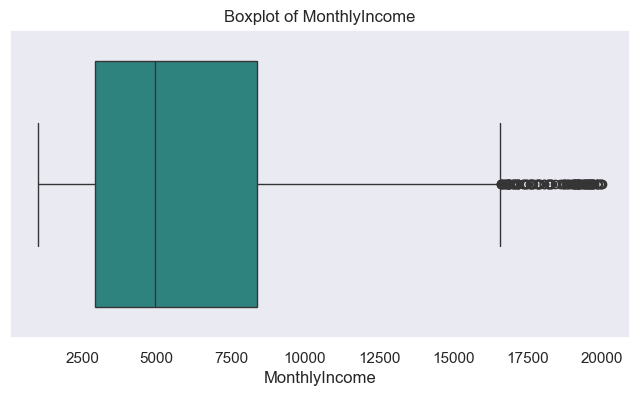

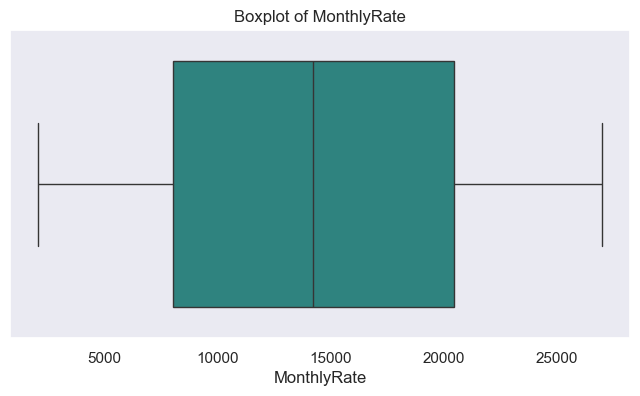

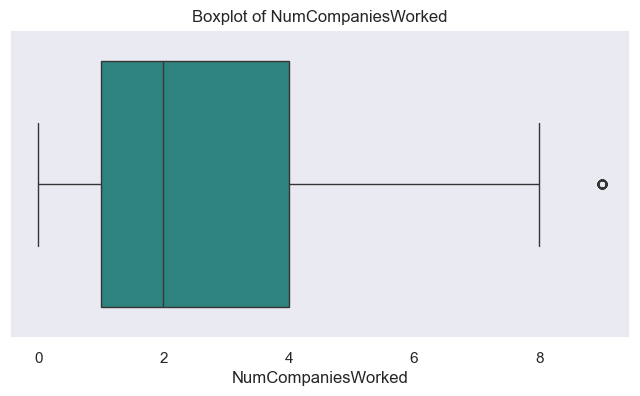

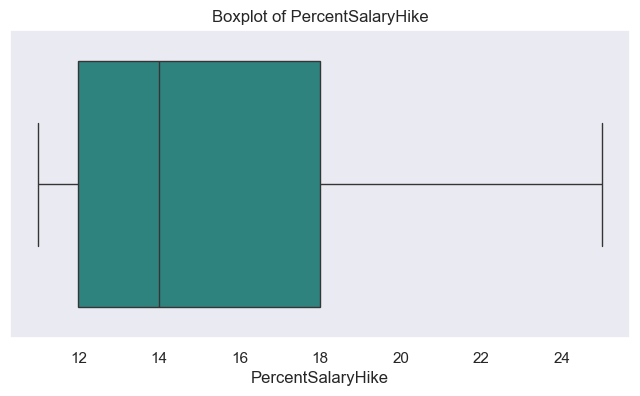

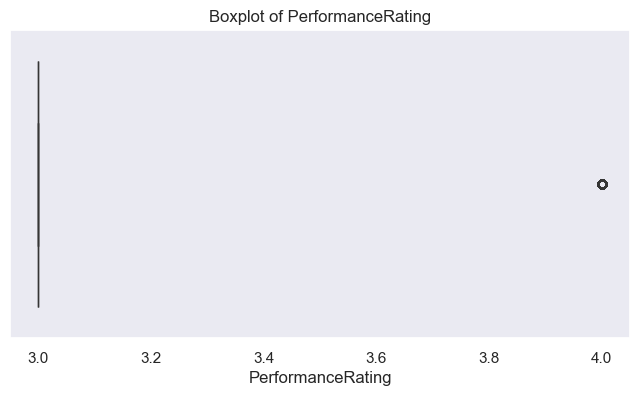

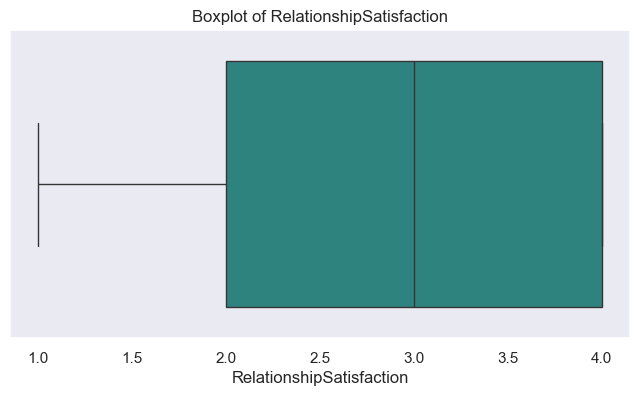

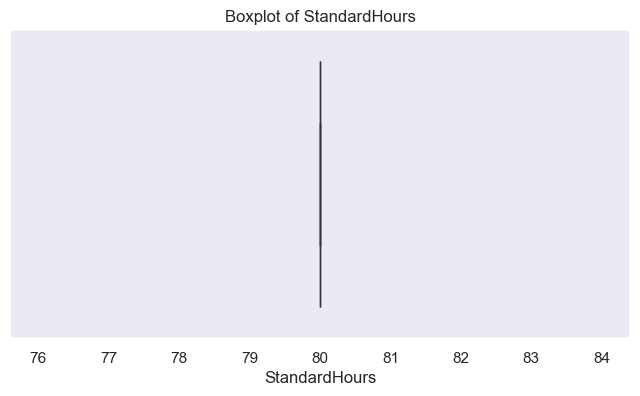

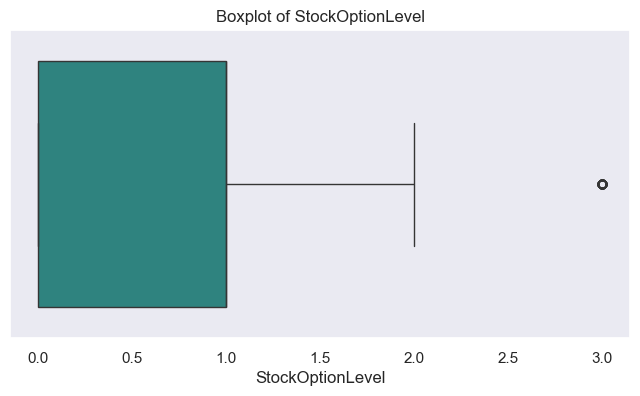

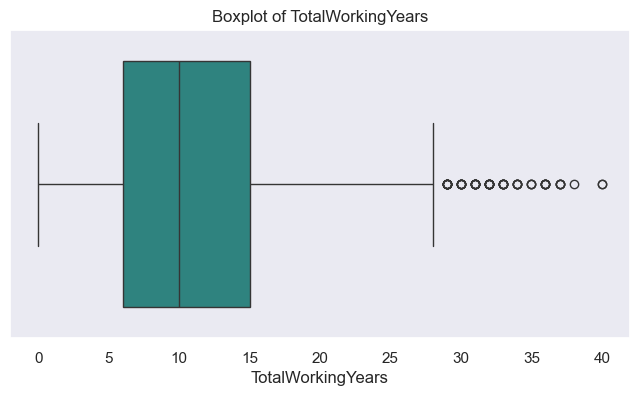

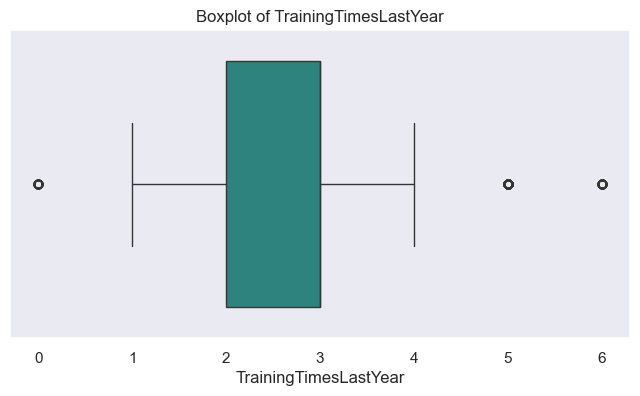

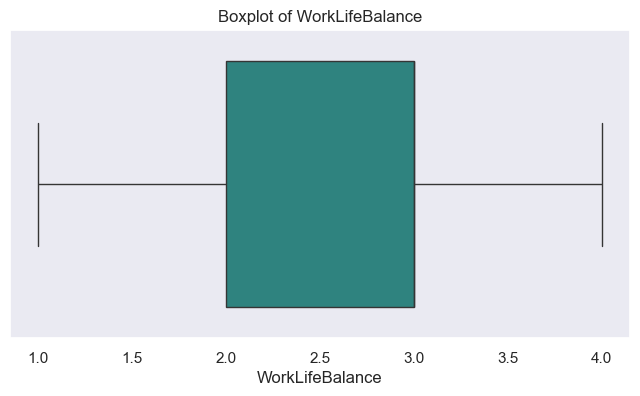

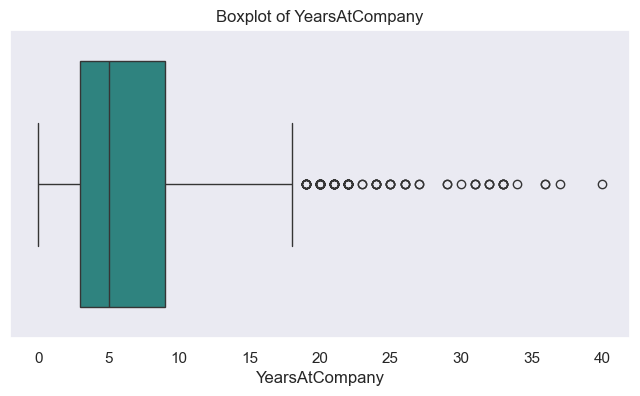

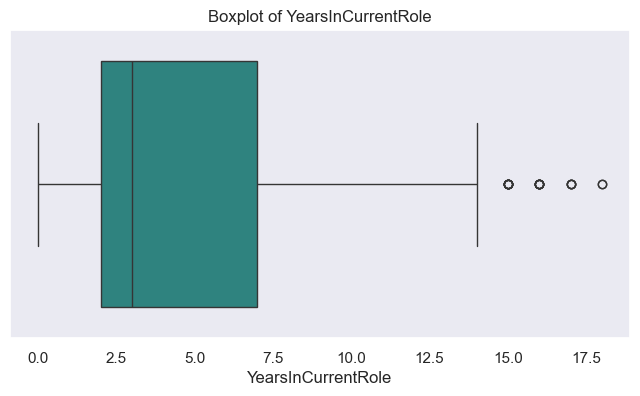

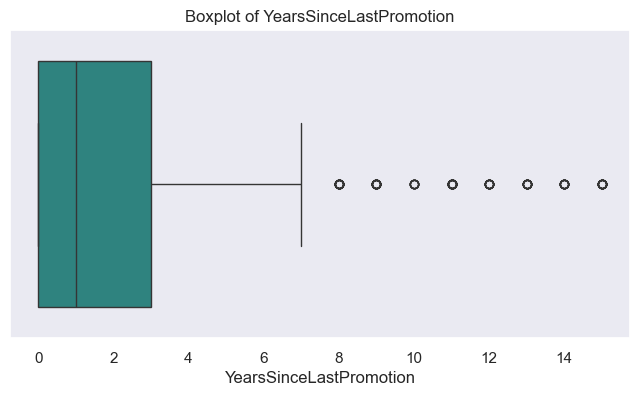

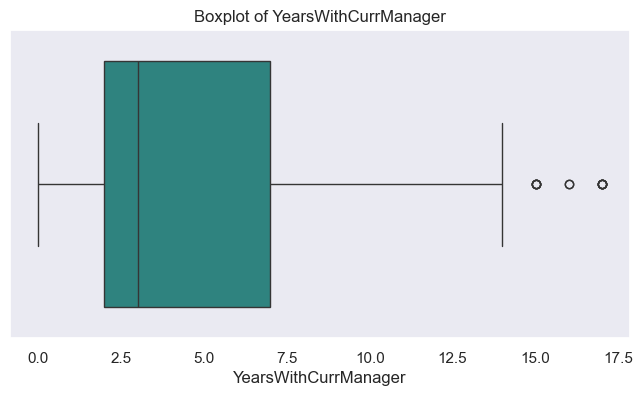

In [266]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col,palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Function to identify Outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [ ]:
# Outlier Treatment
out_col = ['']

outlier_treatment_results = {}

for col in numeric_cols:
    # Detect outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    
    # Count of outliers
    outlier_count = outliers.shape[0]
    
    # Treat outliers using capping (winsorization)
    df[col] = df[col].clip(lower=lower, upper=upper)
    
    # Store the results for summary
    outlier_treatment_results[col] = {
        "Outlier Count Before": outlier_count,
        "Lower Bound": lower,
        "Upper Bound": upper,
    }

# Convert results to a DataFrame for review
outlier_treatment_summary_df = pd.DataFrame(outlier_treatment_results).T
outlier_treatment_summary_df.sort_values("Outlier Count Before", ascending=False)


,Outlier Count Before,Lower Bound,Upper Bound
TrainingTimesLastYear,240.0,0.50,4.50
PerformanceRating,227.0,3.00,3.00
MonthlyIncome,114.0,-5270.00,16576.00
YearsSinceLastPromotion,108.0,-4.50,7.50
YearsAtCompany,105.0,-6.00,18.00
StockOptionLevel,85.0,-1.50,2.50
TotalWorkingYears,63.0,-7.50,28.50
NumCompaniesWorked,52.0,-3.50,8.50
YearsInCurrentRole,21.0,-5.50,14.50
YearsWithCurrManager,13.0,-5.50,14.50


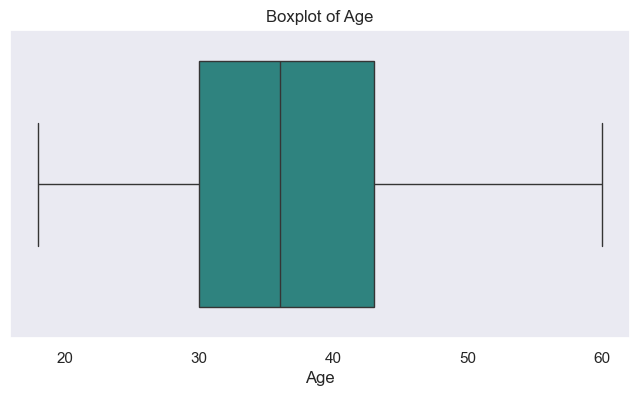

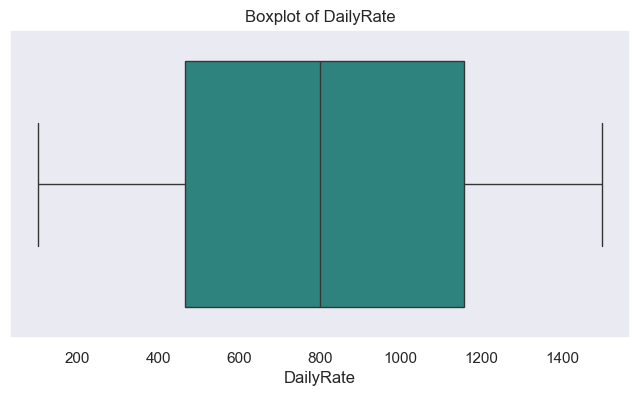

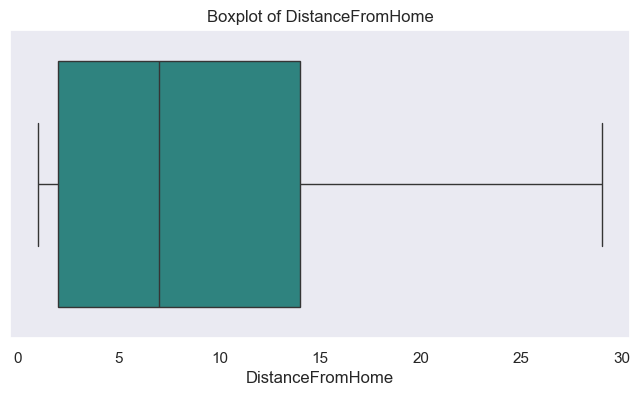

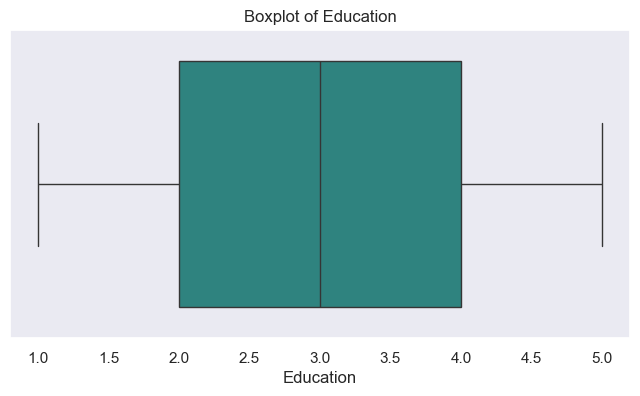

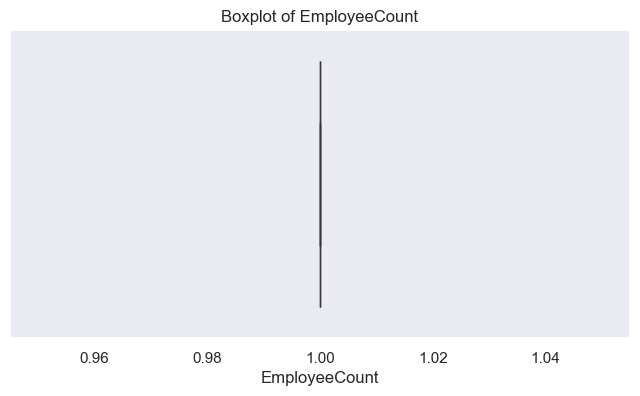

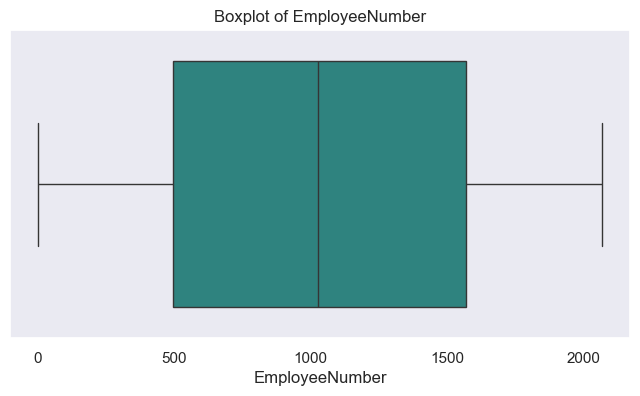

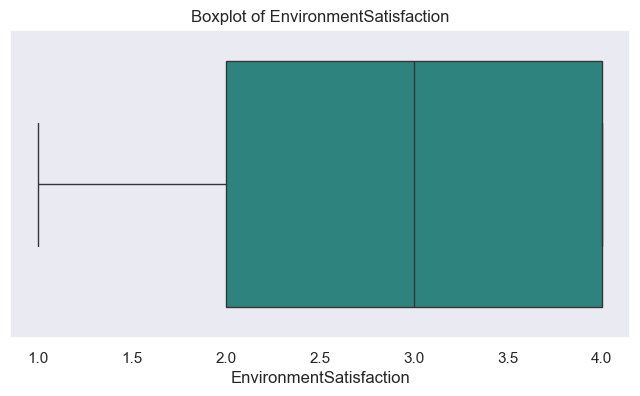

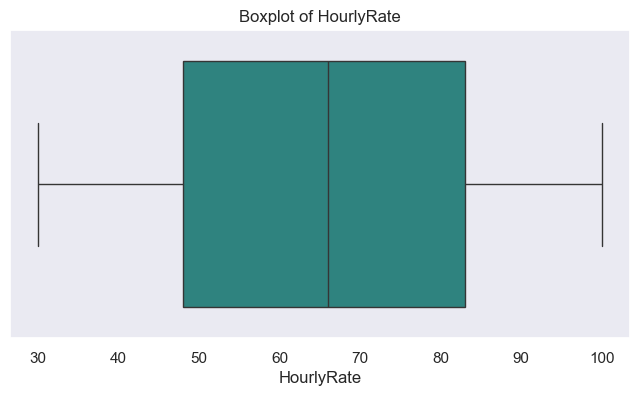

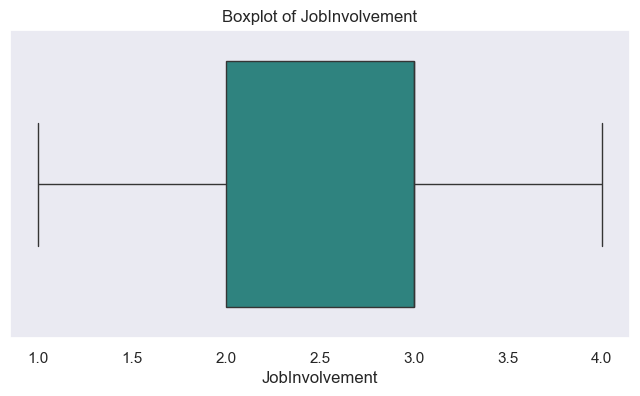

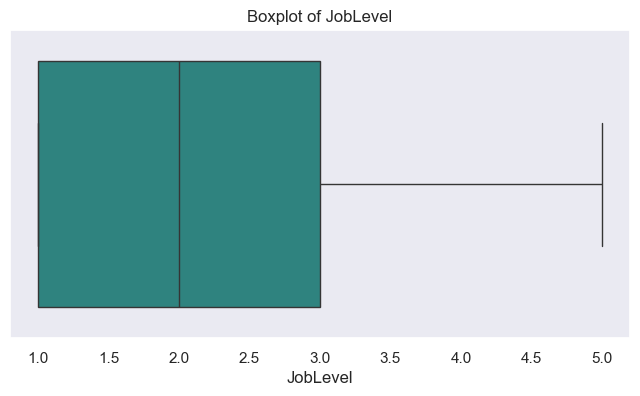

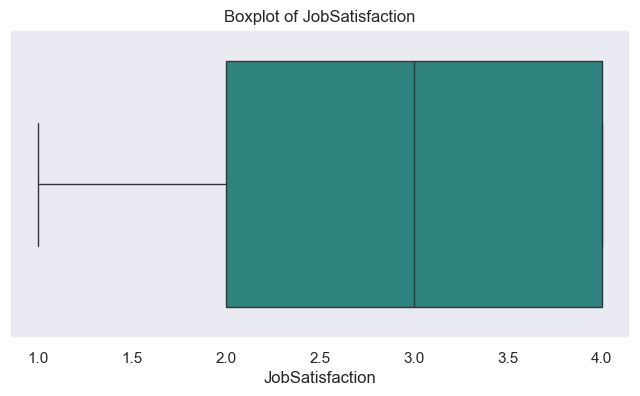

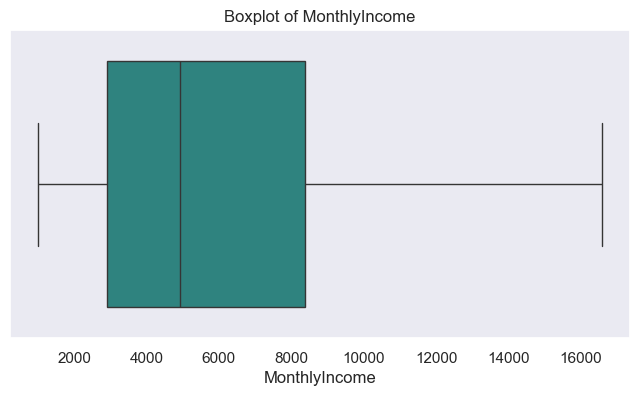

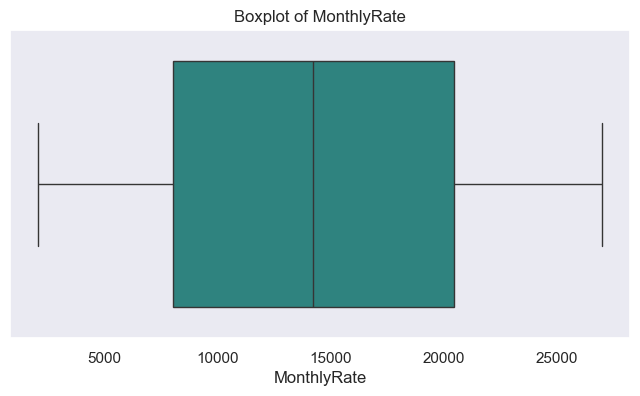

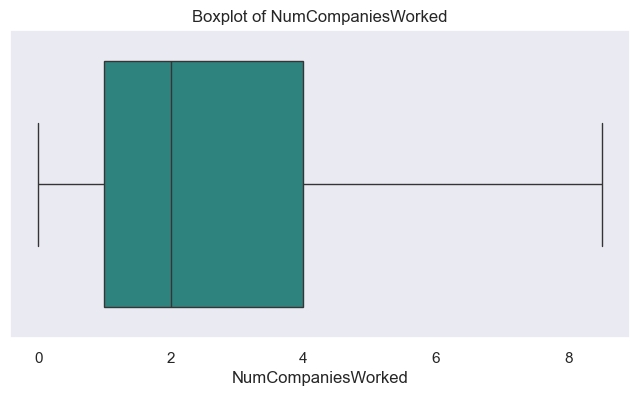

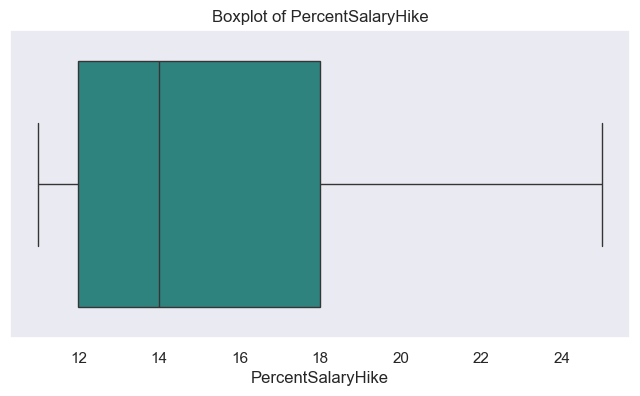

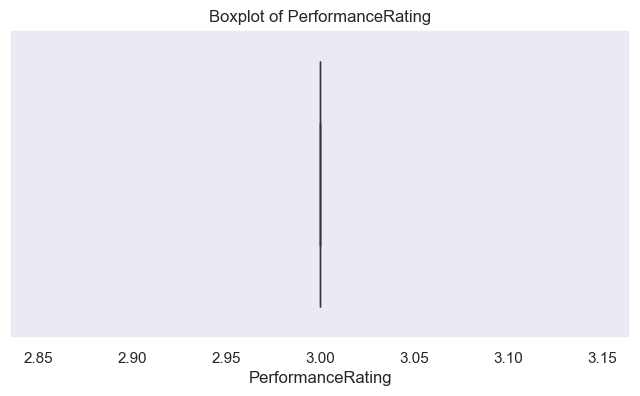

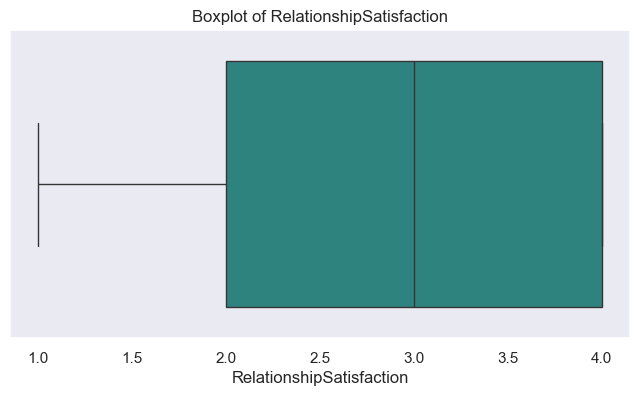

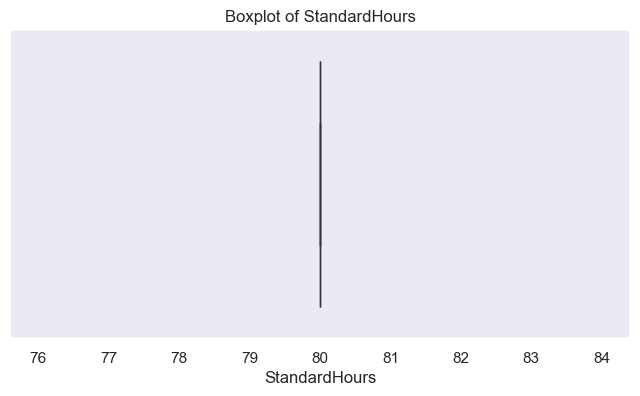

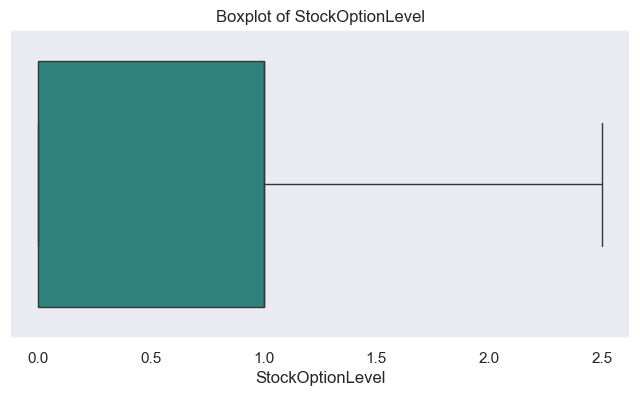

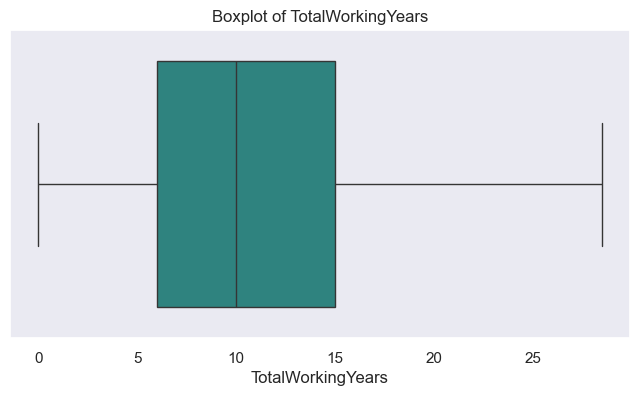

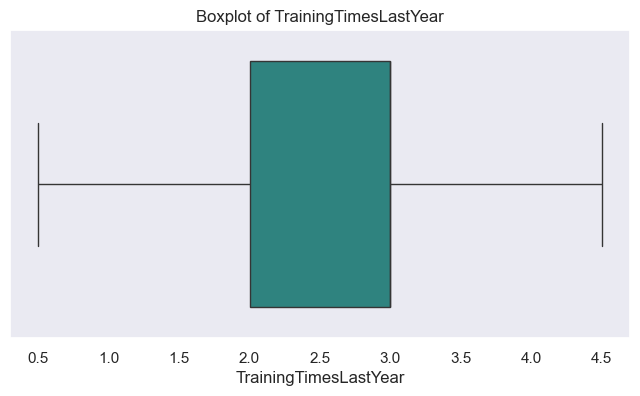

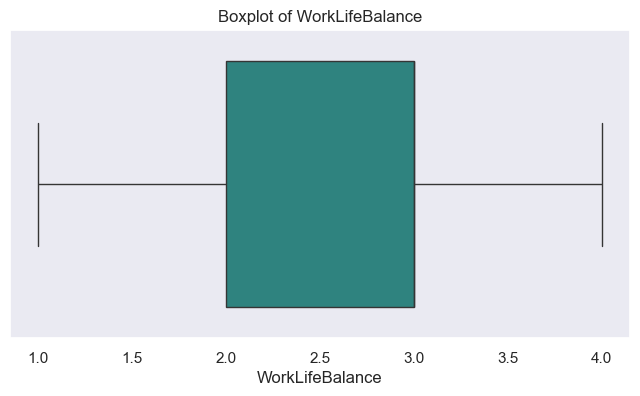

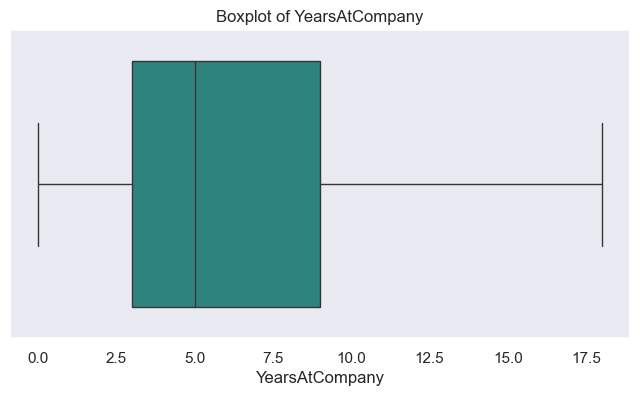

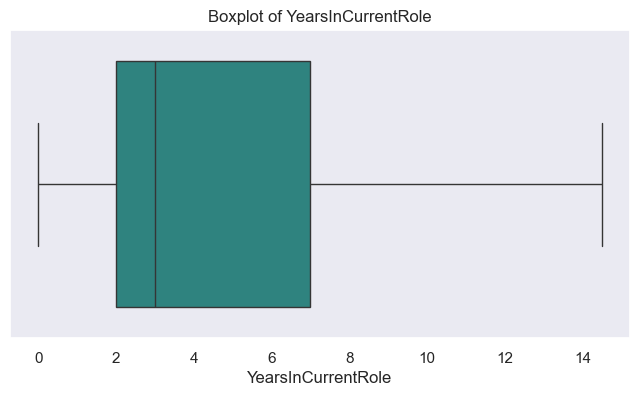

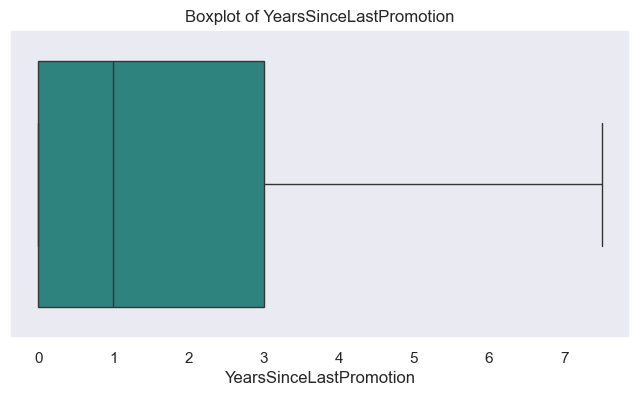

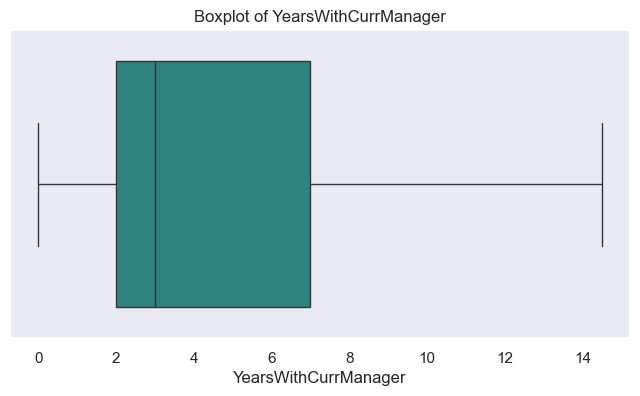

In [269]:
# Plot boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col,palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.show()

Attrition
No     1242
Yes     238
Name: count, dtype: int64


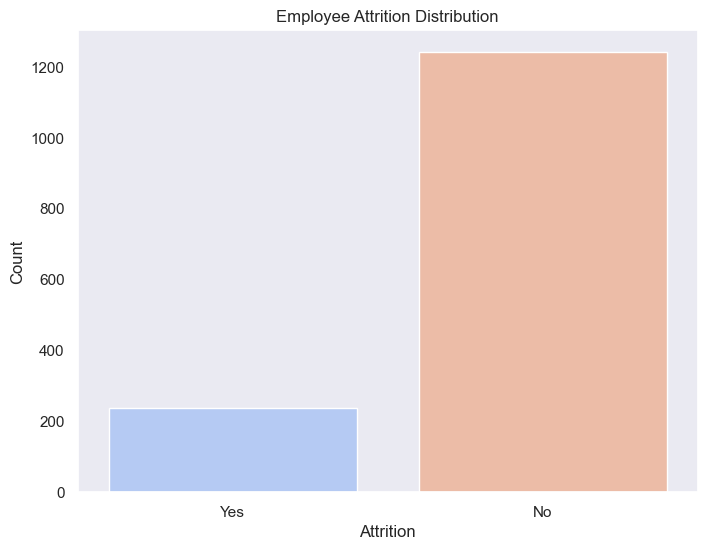

In [270]:
print(df['Attrition'].value_counts())
# Plotting the distribution of Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

### Age and Attrition

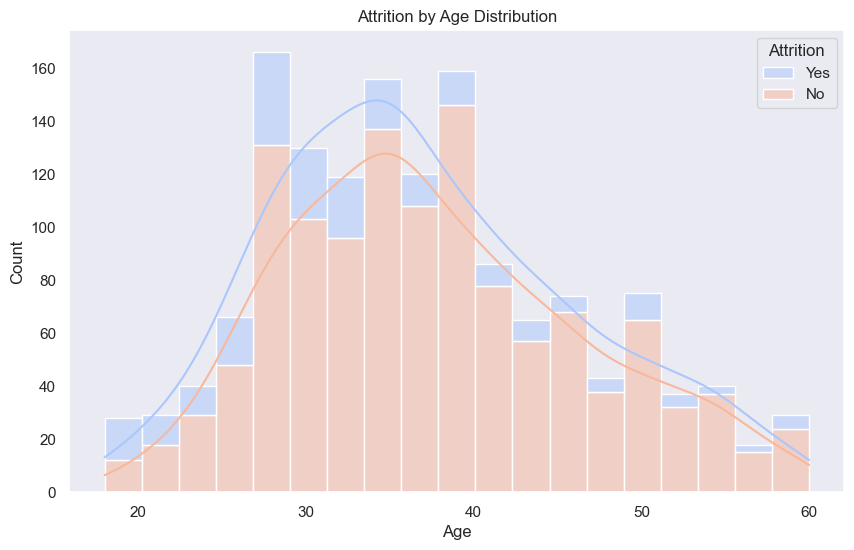

In [271]:
# Visualizing Attrition by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", palette="coolwarm", kde=True)
plt.title("Attrition by Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Job Satisfaction and Attrition

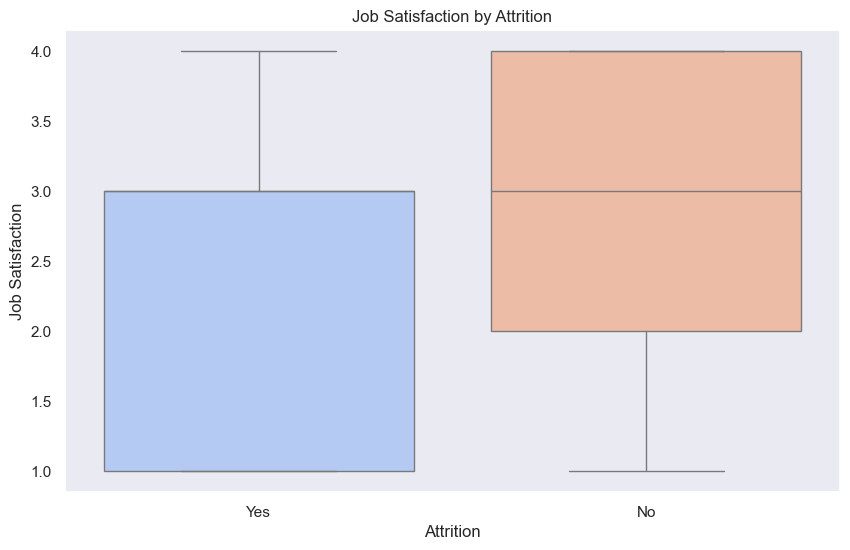

In [272]:
# Visualizing Job Satisfaction by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attrition", y="JobSatisfaction", data=df, palette="coolwarm")
plt.title("Job Satisfaction by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Job Satisfaction")
plt.show()

### Monthly-Income and Attrition

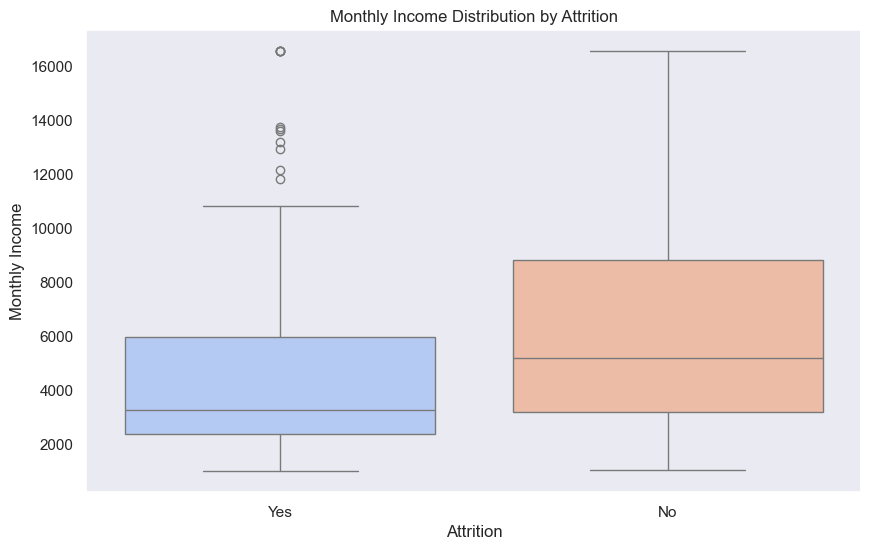

In [273]:
# Visualizing Attrition by Monthly Income
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")
plt.title("Monthly Income Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

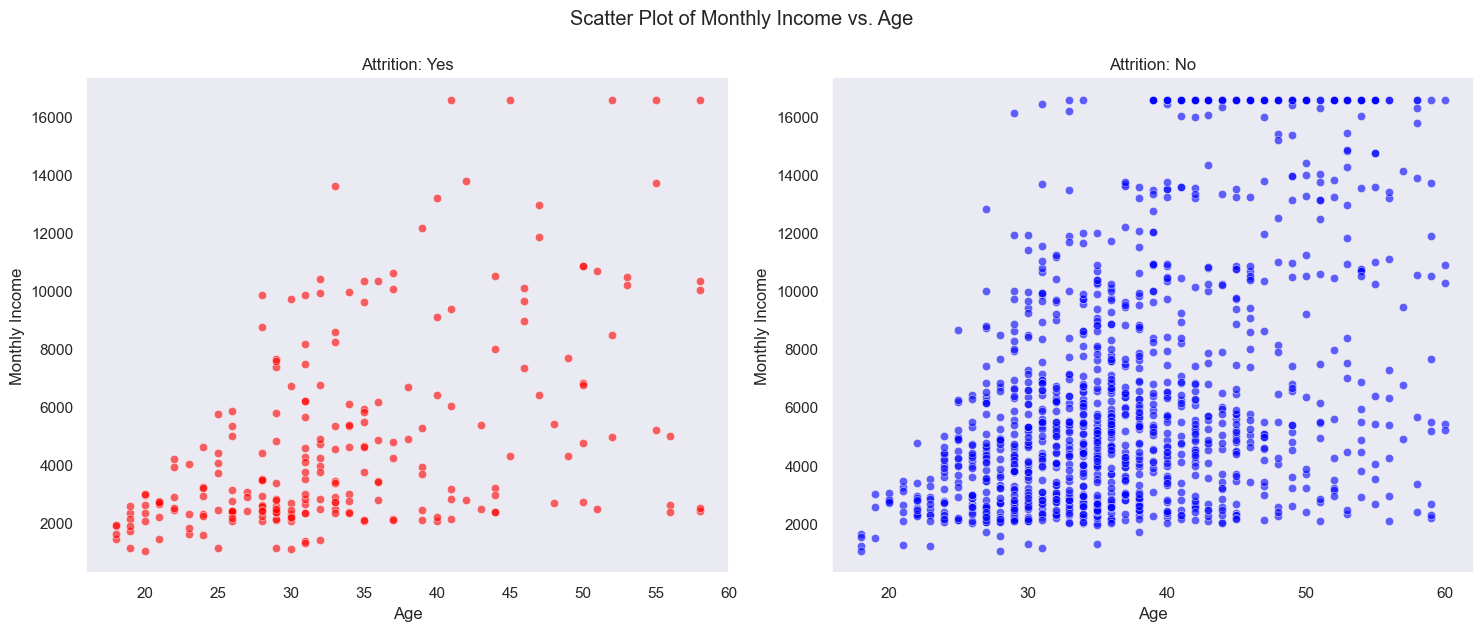

In [277]:
# Scatter plot between Monthly Income and Age
Attrition_Yes = df[df['Attrition'] == 'Yes']
Attrition_No = df[df['Attrition'] == 'No']

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for employees who have left (Attrition = 'Yes')
sns.scatterplot(x='Age', y='MonthlyIncome', data=Attrition_Yes, ax=axs[0], color='red', alpha=0.6)
axs[0].set_title("Attrition: Yes")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Monthly Income")

# Scatter plot for employees who have not left (Attrition = 'No')
sns.scatterplot(x='Age', y='MonthlyIncome', data=Attrition_No, ax=axs[1], color='blue', alpha=0.6)
axs[1].set_title("Attrition: No")
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Monthly Income")

# Adjust layout
plt.tight_layout()
plt.suptitle("Scatter Plot of Monthly Income vs. Age", y=1.05)  # Title for the entire figure
plt.show()

### Correlation and Attrition-Insights

<Axes: >

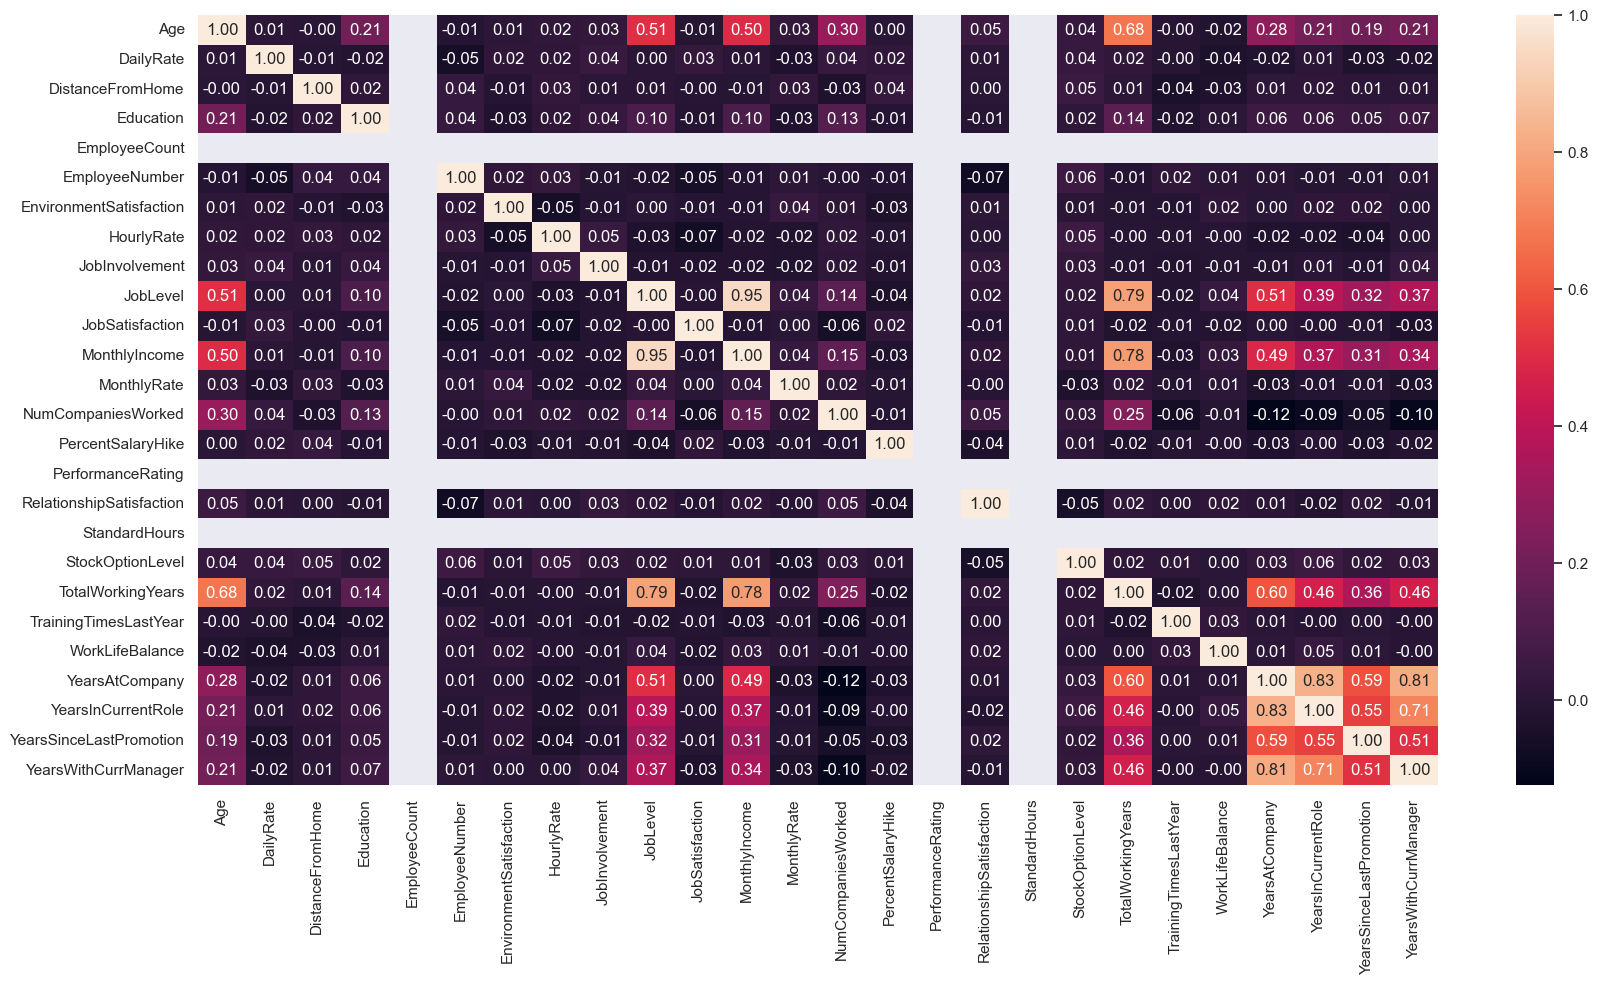

In [278]:
# Calculate the correlation matrix to see which features are correlated
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

The correlation matrix provides insights into the relationships between the variables, which can be useful for understanding the underlying
structure of the data and identifying potential patterns or trends.
- Age and Job Level have a moderate positive correlation (0.51), suggesting that older employees tend to have higher job levels.
- Monthly Income and Job Level have a very strong positive correlation (0.95), indicating that higher job levels correlate with higher incomes.
- Total Working Years and Monthly Income are also strongly correlated (0.77), highlighting that more experienced employees generally earn more
- Age and Total Working Years have a strong positive correlation (0.83), suggesting that older employees have more experience.    

The correlation matrix reveals that the variables are highly interrelated, with strong positive correlations between Age, Job
Level, Monthly Income, and Total Working Years.

In [279]:
# Check attrition-related insights by comparing metrics between Attrition groups
# Calculating mean values of certain attributes for Attrition "Yes" and "No" groups
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

attrition_insights = {
    'Mean Age - Attrition Yes': attrition_yes['Age'].mean(),
    'Mean Age - Attrition No': attrition_no['Age'].mean(),
    'Mean Monthly Income - Attrition Yes': attrition_yes['MonthlyIncome'].mean(),
    'Mean Monthly Income - Attrition No': attrition_no['MonthlyIncome'].mean(),
    'Mean Job Satisfaction - Attrition Yes': attrition_yes['JobSatisfaction'].mean(),
    'Mean Job Satisfaction - Attrition No': attrition_no['JobSatisfaction'].mean(),
    'Mean Years at Company - Attrition Yes': attrition_yes['YearsAtCompany'].mean(),
    'Mean Years at Company - Attrition No': attrition_no['YearsAtCompany'].mean(),
    
}

attrition_insights

{'Mean Age - Attrition Yes': 33.6764705882353,
 'Mean Age - Attrition No': 37.53864734299517,
 'Mean Monthly Income - Attrition Yes': 4751.915966386555,
 'Mean Monthly Income - Attrition No': 6673.530595813205,
 'Mean Job Satisfaction - Attrition Yes': 2.46218487394958,
 'Mean Job Satisfaction - Attrition No': 2.7753623188405796,
 'Mean Years at Company - Attrition Yes': 4.764705882352941,
 'Mean Years at Company - Attrition No': 6.975845410628019}

- Average Age: Employees with attrition are younger (33.7) compared to those without (37.5).
- Monthly Income: The average monthly income is lower for employees with attrition ($4,812) than for those staying ($6,829).
- Job Satisfaction: Employees with attrition report lower job satisfaction (2.46) compared to those without (2.78).
- Years at Company: Employees with attrition have spent fewer years at the company (5.1) versus employees without attrition (7.4).

### Attrition Rates by Job Role

In [280]:
# Calculating attrition rate per job role
job_role_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
job_role_attrition = job_role_attrition.rename(columns={'Yes': 'Attrition Rate (%)'}).sort_values(by='Attrition Rate (%)', ascending=False)
job_role_attrition

Attrition,No,Attrition Rate (%)
JobRole,,
Sales Representative,60.714286,39.285714
Laboratory Technician,76.245211,23.754789
Human Resources,76.923077,23.076923
Sales Executive,82.370821,17.629179
Research Scientist,83.959044,16.040956
Healthcare Representative,93.181818,6.818182
Manufacturing Director,93.197279,6.802721
Manager,95.098039,4.901961
Research Director,97.500000,2.500000


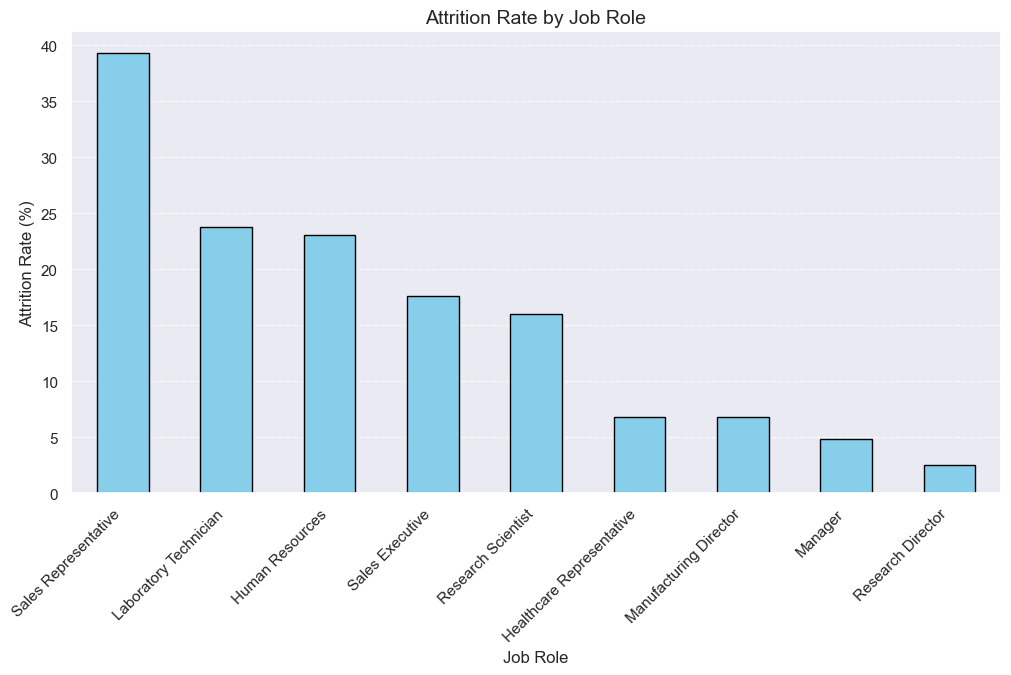

In [281]:
# Plotting the attrition rate by job role
plt.figure(figsize=(12, 6))
job_role_attrition['Attrition Rate (%)'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Attrition Rate by Job Role", fontsize=14)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xlabel("Job Role", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Attrition and Overtime

In [282]:
# Calculating attrition rates for employees working overtime vs those who don’t
overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100
overtime_attrition = overtime_attrition.rename(columns={'Yes': 'Attrition Rate (%)'}).sort_values(by='Attrition Rate (%)', ascending=False)
overtime_attrition

Attrition,No,Attrition Rate (%)
OverTime,,
Yes,69.377990,30.622010
No,89.642185,10.357815


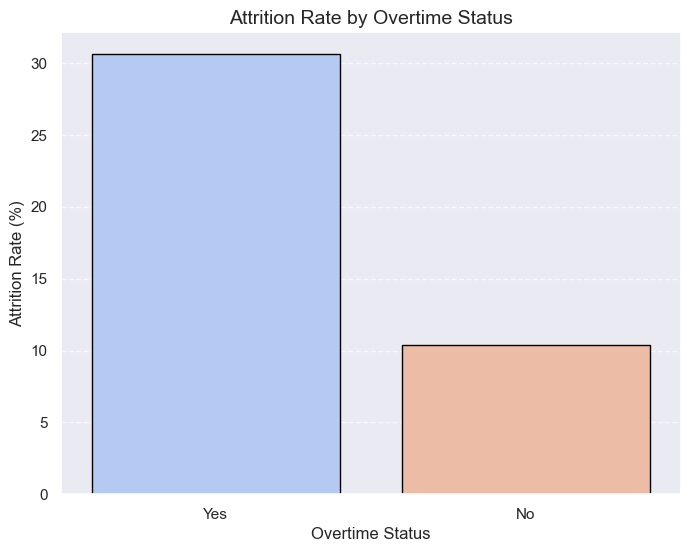

In [283]:
# Plotting the attrition rate for overtime
plt.figure(figsize=(8, 6))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition['Attrition Rate (%)'], palette='coolwarm', edgecolor='black')
plt.title("Attrition Rate by Overtime Status", fontsize=14)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xlabel("Overtime Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Gender-Wise Attrition

In [284]:

gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100
gender_attrition = gender_attrition.rename(columns={'Yes': 'Attrition Rate (%)'})
gender_attrition_rate = gender_attrition['Attrition Rate (%)']
gender_attrition_rate

Gender
Female    14.720812
Male      16.985377
Name: Attrition Rate (%), dtype: float64

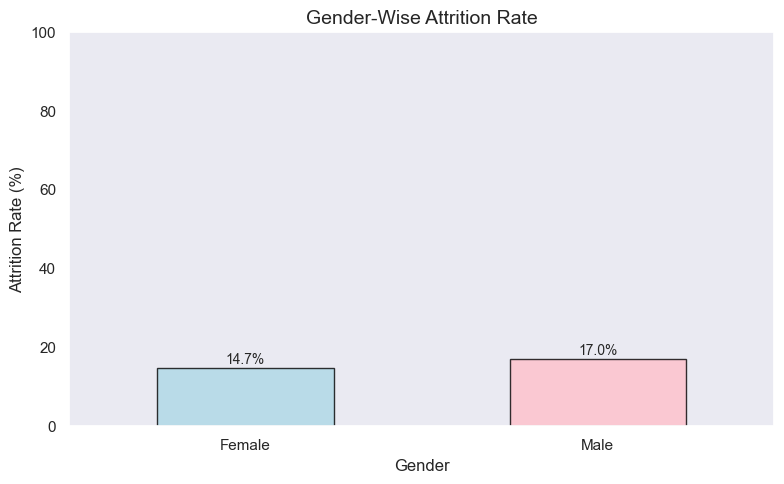

In [285]:

plt.figure(figsize=(8, 5))
gender_attrition_rate.plot(kind='bar', color=['lightblue', 'pink'], alpha=0.8, edgecolor='black')
plt.title('Gender-Wise Attrition Rate', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)

for index, value in enumerate(gender_attrition_rate):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


### Attrition and Work-Life Balance

In [286]:
# Calculating average work-life balance for employees with and without attrition
work_life_balance_attrition = df.groupby('Attrition')['WorkLifeBalance'].mean()
work_life_balance_attrition

Attrition
No     2.780193
Yes    2.659664
Name: WorkLifeBalance, dtype: float64

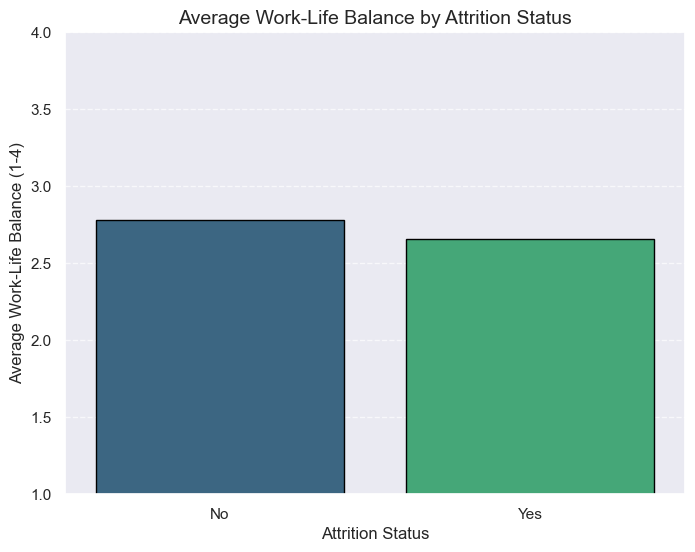

In [287]:
# Plotting the work-life balance comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=work_life_balance_attrition.index, y=work_life_balance_attrition.values, palette='viridis', edgecolor='black')
plt.title("Average Work-Life Balance by Attrition Status", fontsize=14)
plt.ylabel("Average Work-Life Balance (1-4)", fontsize=12)
plt.xlabel("Attrition Status", fontsize=12)
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Department-Wise Analysis of Monthly Income and Satisfaction

In [288]:
# Calculating average monthly income and job satisfaction by department
department_analysis = df.groupby('Department').agg({
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean',
    'Attrition': lambda x: (x == 'Yes').mean() * 100  # Attrition rate as a percentage
}).rename(columns={'Attrition': 'Attrition Rate (%)', 'MonthlyIncome': 'Average Monthly Income', 'JobSatisfaction': 'Average Job Satisfaction'})

department_analysis


,Average Monthly Income,Average Job Satisfaction,Attrition Rate (%)
Department,,,
Human Resources,6347.714286,2.603175,19.047619
Research & Development,6126.224405,2.721820,13.753878
Sales,6878.924444,2.748889,20.666667


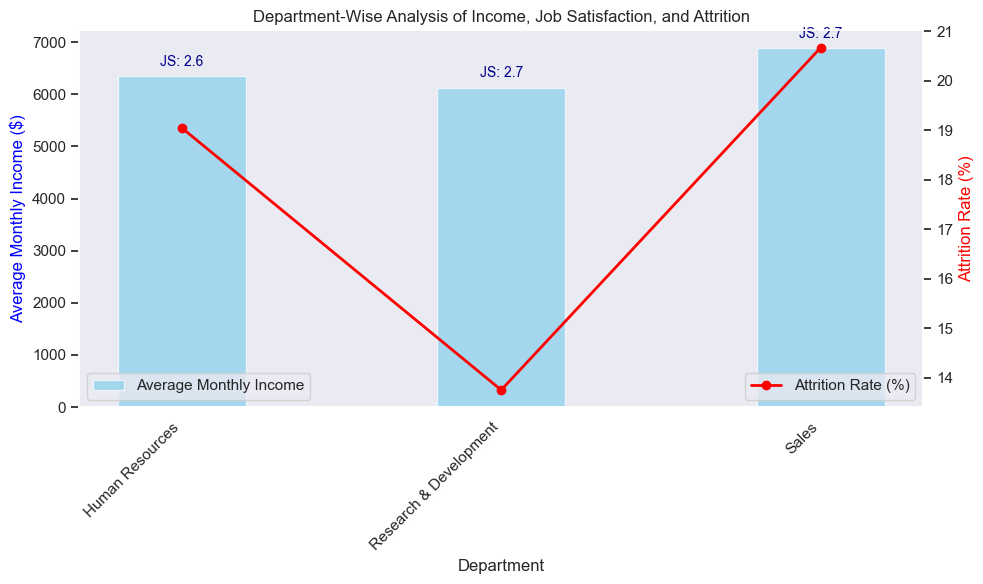

In [ ]:
# Extracting data for plotting from department_analysis
departments = department_analysis.index
average_income = department_analysis['Average Monthly Income']
average_satisfaction = department_analysis['Average Job Satisfaction']
attrition_rate = department_analysis['Attrition Rate (%)']

# Creating a dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Average Monthly Income
bar_width = 0.4
bar_positions = range(len(departments))
ax1.bar(bar_positions, average_income, width=bar_width, color='skyblue', label='Average Monthly Income', alpha=0.7)
ax1.set_ylabel('Average Monthly Income ($)', color='blue')
ax1.set_xlabel('Department')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(departments, rotation=45, ha='right')

# Adding a secondary y-axis for Attrition Rate
ax2 = ax1.twinx()
ax2.plot(bar_positions, attrition_rate, color='red', marker='o', label='Attrition Rate (%)', linewidth=2)
ax2.set_ylabel('Attrition Rate (%)', color='red')

# Adding Average Job Satisfaction on the same bar
for idx, value in enumerate(average_satisfaction):
    ax1.text(idx, average_income[idx] + 200, f'JS: {value:.1f}', ha='center', color='darkblue', fontsize=10)

# Adding a title and legend
plt.title('Department-Wise Analysis of Income, Job Satisfaction, and Attrition')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

### Conclusion

The analysis highlights critical areas affecting employee retention, including job roles, work-life balance, and overtime. By addressing these issues, the organization can improve employee satisfaction and reduce attrition rates.